In [1]:
require(tidyverse)

Loading required package: tidyverse

Warning message:
"package 'tidyverse' was built under R version 3.6.2"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.2"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [133]:
k_17 <- read.csv("table_export_DATA_2017.csv")

In [134]:
k_17$POST_DATE <- as.Date(k_17$POST_DATE)
k_17$EMP_NUM <- as.factor(k_17$EMP_NUM)
k_17$SUP_EMP_NUM <- as.factor(k_17$SUP_EMP_NUM)
k_17$OPERATION_NUM <- as.factor(k_17$OPERATION_NUM)
k_17$PRODUCT_LINE <- as.factor(k_17$PRODUCT_LINE)
k_17$PRODUCT_CELL_ID <- as.factor(k_17$PRODUCT_CELL_ID)
k_17$ROUTING_GROUP_ID <- as.factor(k_17$ROUTING_GROUP_ID)
k_17$DOC <- as.factor(k_17$DOC)

In [135]:
k_17 <- mutate(k_17,HRS_part = HRS/QUANTITY)

In [136]:
a <- as.matrix(which(is.na(k_17$QUANTITY)))
k_17 <- k_17[-a[1],]
k_17 <- k_17[-(a[2]-1),]
k_17 <- k_17[-(a[3]-2),]
sum(is.na(k_17))

[1] 1010304

In [35]:
summary(k_17)

   POST_DATE             EMP_NUM         SUP_EMP_NUM        WORK_ORDER       
 Min.   :0001-01-20   818888 :  15207   823708 : 168120   Min.   : 16875303  
 1st Qu.:0004-04-20   841336 :  12751   824077 : 121118   1st Qu.:161062715  
 Median :0006-12-20   827944 :  11485   840323 : 106048   Median :161469626  
 Mean   :0007-03-10   818954 :  11061   845260 : 104003   Mean   :161382627  
 3rd Qu.:0010-04-20   825513 :  10606   818933 : 103368   3rd Qu.:161880557  
 Max.   :0012-12-20   837189 :  10505   (Other):1013911   Max.   :162328204  
 NA's   :1010167      (Other):1545090   NA's   :    137                      
 OPERATION_NUM        QUANTITY             HRS           HRS_CLASS  
 10     : 104042   Min.   :   1.000   Min.   :-40.0000   R:1373277  
 30     :  81730   1st Qu.:   1.000   1st Qu.:  0.1100   S:     10  
 20     :  80329   Median :   2.000   Median :  0.2400   T: 243403  
 50     :  78450   Mean   :   6.511   Mean   :  0.4162   V:     15  
 40     :  73611   3rd Qu.:   6

In [86]:
A <- as.matrix(unique(k_17$ROUTING_GROUP_ID))

In [87]:
CV <- data.frame(Part = integer(),cv = double(),mean = double())
for (i in 1:dim(A)[1]){
    part <- k_17[k_17$ROUTING_GROUP_ID == A[i],]
    w <- group_by(part,WORK_ORDER)
    b <- arrange(summarise(w,cycle_time = sum(HRS_part)),cycle_time)
    CV[i,1] <- A[i]
    CV[i,3] <- sum(b$cycle_time)/dim(b)[1]
    CV[i,2] <- (var(b$cycle_time))^0.5/CV[i,3]
    }

In [90]:
arrange(CV,desc(cv))

Part,cv,mean
<chr>,<dbl>,<dbl>
522,3.156175,0.038203704
5304,2.250035,0.227476190
3932,2.024986,0.497657143
4574,1.922330,0.531177273
3881,1.881799,1.208181818
4536,1.720662,0.001875636
3816,1.713882,0.238333333
4640,1.568184,0.087166667
3606,1.550988,0.138592593


In [44]:
part <- k_17[k_17$ROUTING_GROUP_ID == '4509',]
    w <- group_by(part,WORK_ORDER)
    b <- arrange(summarise(w,cycle_time = sum(HRS_part)),cycle_time)

[1] NA

[1] 107.23

WORK_ORDER,cycle_time
<int>,<dbl>
18598327,107.23


In [137]:
O <- as.matrix(unique(k_17$OPERATION_NUM))

In [138]:
CV <- data.frame(Operation = integer(),cv = double(),mean = double())
for (i in 1:dim(O)[1]){
    op <- k_17[k_17$OPERATION_NUM == O[i],]
    w <- group_by(op,WORK_ORDER)
    b <- arrange(summarise(w,cycle_time = sum(HRS_part)),cycle_time)
    CV[i,1] <- A[i]
    CV[i,2] <- (var(b$cycle_time))^0.5/(sum(b$cycle_time)/dim(b)[1])
    CV[i,3] <- sum(b$cycle_time)/dim(b)[1]
}

In [139]:
arrange(CV,desc(cv))

Operation,cv,mean
<chr>,<dbl>,<dbl>
2069,5.952107,0.07037658
1902,4.732494,0.00789889
4991,3.959429,0.06728580
2013,2.952684,0.14456400
4766,2.699856,0.07031620
2734,2.545312,0.37753165
2294,2.521586,0.30407648
2706,2.514321,0.04554090
2098,2.432190,0.34486978


Warning message:
"Removed 19 rows containing missing values (geom_point)."
Warning message:
"Removed 19 rows containing missing values (geom_text)."


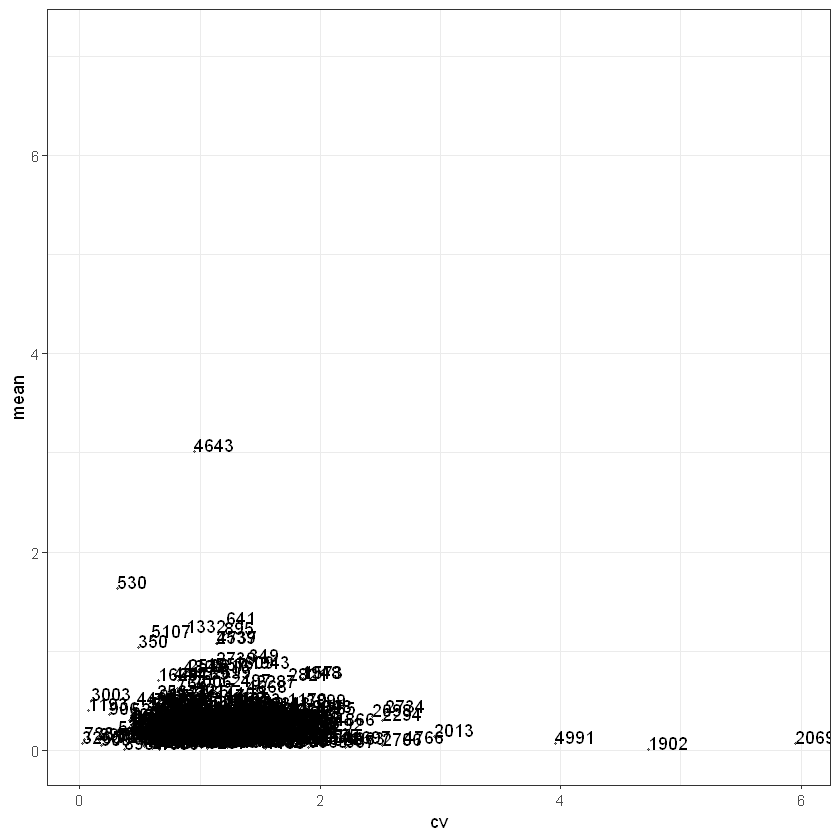

In [141]:
ggplot(CV,aes(x = cv,y = mean,label = Operation)) + geom_point(size = 0.4,alpha = 0.5) + theme_bw()+

  geom_text(aes(label=Operation),hjust=0, vjust=0)

In [142]:
k_18 <- read.csv("table_export_DATA_2018.csv")

In [143]:
k_18$POST_DATE <- as.Date(k_18$POST_DATE)
k_18$EMP_NUM <- as.factor(k_18$EMP_NUM)
k_18$SUP_EMP_NUM <- as.factor(k_18$SUP_EMP_NUM)
k_18$OPERATION_NUM <- as.factor(k_18$OPERATION_NUM)
k_18$PRODUCT_LINE <- as.factor(k_18$PRODUCT_LINE)
k_18$PRODUCT_CELL_ID <- as.factor(k_18$PRODUCT_CELL_ID)
k_18$ROUTING_GROUP_ID <- as.factor(k_18$ROUTING_GROUP_ID)
k_18$DOC <- as.factor(k_18$DOC)

In [144]:
k_18 <- mutate(k_18,HRS_part = HRS/QUANTITY)
summary(k_18)

   POST_DATE             EMP_NUM         SUP_EMP_NUM       WORK_ORDER       
 Min.   :0001-02-20   818800 :  18700   824753 :222849   Min.   :160296206  
 1st Qu.:0004-02-20   818888 :  18298   845599 :161744   1st Qu.:162700427  
 Median :0006-11-20   818623 :  14192   823708 :153403   Median :163116665  
 Mean   :0007-02-11   849197 :  13596   835447 :149287   Mean   :163120370  
 3rd Qu.:0010-04-20   837189 :  12639   829449 :127490   3rd Qu.:163547112  
 Max.   :0012-12-20   821132 :  11567   845260 :126511   Max.   :164035707  
 NA's   :1163066      (Other):1796763   (Other):944471                      
 OPERATION_NUM        QUANTITY             HRS           HRS_CLASS  
 10     : 112132   Min.   :   1.000   Min.   :-144.000   R:1542824  
 30     :  95260   1st Qu.:   1.000   1st Qu.:   0.100   S:     58  
 50     :  92666   Median :   1.000   Median :   0.220   T: 342853  
 20     :  91181   Mean   :   5.849   Mean   :   0.391   U:      4  
 40     :  86954   3rd Qu.:   6.000   3

In [98]:
A <- as.matrix(unique(k_18$ROUTING_GROUP_ID))

In [99]:
CV <- data.frame(Part = integer(),cv = double(),mean = double())
for (i in 1:dim(A)[1]){
    part <- k_18[k_18$ROUTING_GROUP_ID == A[i],]
    w <- group_by(part,WORK_ORDER)
    b <- arrange(summarise(w,cycle_time = sum(HRS_part)),cycle_time)
    CV[i,1] <- A[i]
    CV[i,2] <- (var(b$cycle_time))^0.5/(sum(b$cycle_time)/dim(b)[1])
    CV[i,3] <- sum(b$cycle_time)/dim(b)[1]
}

In [100]:
arrange(CV,desc(cv))

Part,cv,mean
<chr>,<dbl>,<dbl>
353,2.044035,0.038262784
5053,1.770379,0.231661538
5050,1.721877,0.163142857
1784,1.638039,0.297202381
1565,1.631963,0.033468448
1996,1.551015,0.035151235
3345,1.543815,2.182142857
1607,1.540008,0.082550926
2218,1.529401,2.103625000


In [145]:
O <- as.matrix(unique(k_18$OPERATION_NUM))

In [146]:
CV <- data.frame(Operation = integer(),cv = double(),mean = double())
for (i in 1:dim(O)[1]){
    op <- k_18[k_18$OPERATION_NUM == O[i],]
    w <- group_by(op,WORK_ORDER)
    b <- arrange(summarise(w,cycle_time = sum(HRS_part)),cycle_time)
    CV[i,1] <- A[i]
    CV[i,2] <- (var(b$cycle_time))^0.5/(sum(b$cycle_time)/dim(b)[1])
    CV[i,3] <- sum(b$cycle_time)/dim(b)[1]
}

In [147]:
arrange(CV,desc(cv))

Operation,cv,mean
<chr>,<dbl>,<dbl>
4102,4.797127,0.01084737
2064,3.328109,0.03818731
2698,2.870938,0.10155111
2817,2.732548,0.06811573
5155,2.658016,0.07293827
4866,2.563746,0.08849469
925,2.552511,0.08695575
2750,2.127869,0.07746679
4725,2.119939,0.12170187


Warning message:
"Removed 19 rows containing missing values (geom_point)."
Warning message:
"Removed 19 rows containing missing values (geom_text)."


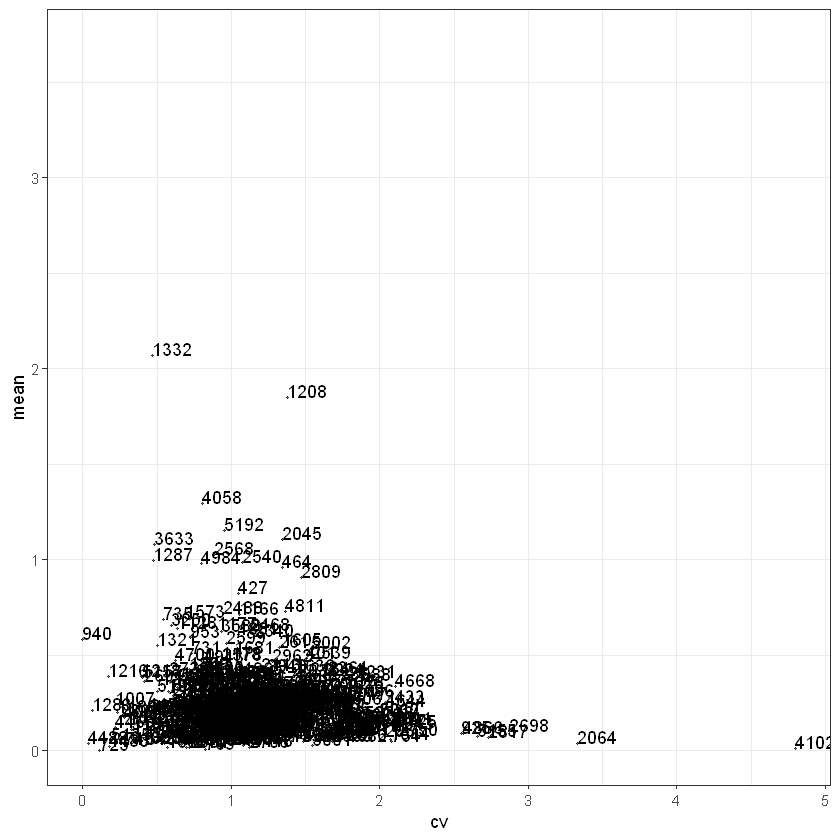

In [148]:
ggplot(CV, aes(x= cv, y= mean, label= Operation)) + 

  geom_point(size = 0.5,alpha = 0.6) +

  theme_bw()+

  geom_text(aes(label=Operation),hjust=0, vjust=0)

In [149]:
k_19 <- read.csv("table_export_DATA_2019.csv")
k_19$POST_DATE <- as.Date(k_19$POST_DATE)
k_19$EMP_NUM <- as.factor(k_19$EMP_NUM)
k_19$SUP_EMP_NUM <- as.factor(k_19$SUP_EMP_NUM)
k_19$OPERATION_NUM <- as.factor(k_19$OPERATION_NUM)
k_19$PRODUCT_LINE <- as.factor(k_19$PRODUCT_LINE)
k_19$PRODUCT_CELL_ID <- as.factor(k_19$PRODUCT_CELL_ID)
k_19$ROUTING_GROUP_ID <- as.factor(k_19$ROUTING_GROUP_ID)
k_19$DOC <- as.factor(k_19$DOC)

In [150]:
k_19 <- mutate(k_19,HRS_part = HRS/QUANTITY)
summary(k_19)

   POST_DATE             EMP_NUM         SUP_EMP_NUM        WORK_ORDER       
 Min.   :0001-02-20   818800 :  25220   849797 : 221600   Min.   :161796439  
 1st Qu.:0004-01-20   818888 :  22608   823708 : 152168   1st Qu.:164406931  
 Median :0006-12-20   849197 :  16821   875510 : 149584   Median :164828149  
 Mean   :0007-01-14   818623 :  15583   824753 : 134641   Mean   :164836536  
 3rd Qu.:0010-01-20   825513 :  15201   845260 : 113735   3rd Qu.:165269596  
 Max.   :0012-12-20   849786 :  13082   818777 : 102279   Max.   :165802779  
 NA's   :1342455      (Other):2094762   (Other):1329270                      
 OPERATION_NUM        QUANTITY             HRS           HRS_CLASS  
 10     : 120631   Min.   :   1.000   Min.   :-144.000   D:      2  
 30     : 113788   1st Qu.:   1.000   1st Qu.:   0.090   R:1826112  
 50     : 108951   Median :   1.000   Median :   0.200   S:    386  
 40     :  97360   Mean   :   5.724   Mean   :   0.371   T: 376767  
 20     :  96878   3rd Qu.:   5

In [107]:
A <- as.matrix(unique(k_19$ROUTING_GROUP_ID))

In [108]:
CV <- data.frame(Part = integer(),cv = double(),mean = double())
for (i in 1:dim(A)[1]){
    part <- k_19[k_19$ROUTING_GROUP_ID == A[i],]
    w <- group_by(part,WORK_ORDER)
    b <- arrange(summarise(w,cycle_time = sum(HRS_part)),cycle_time)
    CV[i,1] <- A[i]
    CV[i,2] <- (var(b$cycle_time))^0.5/(sum(b$cycle_time)/dim(b)[1])
    CV[i,3] <- sum(b$cycle_time)/dim(b)[1]
}

In [109]:
arrange(CV,desc(cv))

Part,cv,mean
<chr>,<dbl>,<dbl>
2283,3.039108,0.02936210
1875,2.945100,0.25039524
4641,2.784260,0.40691138
353,2.760960,0.02585837
1575,1.970768,0.15295000
4684,1.925416,0.22564773
1366,1.807353,0.12820833
1553,1.762326,0.50872619
5298,1.730184,0.09150000


In [151]:
O <- as.matrix(unique(k_19$OPERATION_NUM))

In [152]:
CV <- data.frame(Operation = integer(),cv = double(),mean = double())
for (i in 1:dim(O)[1]){
    part <- k_19[k_19$OPERATION_NUM == O[i],]
    w <- group_by(part,WORK_ORDER)
    b <- arrange(summarise(w,cycle_time = sum(HRS_part)),cycle_time)
    CV[i,1] <- A[i]
    CV[i,2] <- (var(b$cycle_time))^0.5/(sum(b$cycle_time)/dim(b)[1])
    CV[i,3] <- sum(b$cycle_time)/dim(b)[1]
}

In [153]:
arrange(CV,desc(cv))

Operation,cv,mean
<chr>,<dbl>,<dbl>
2757,8.933784,0.005561627
1948,2.559543,0.090664416
3838,2.332128,0.088093815
3287,2.308995,0.119822695
1115,2.207410,0.115141939
2045,2.187208,0.223314286
2817,2.175489,0.139513636
3309,2.097534,0.295384517
1902,2.058976,0.142762812


Warning message:
"Removed 8 rows containing missing values (geom_point)."
Warning message:
"Removed 8 rows containing missing values (geom_text)."


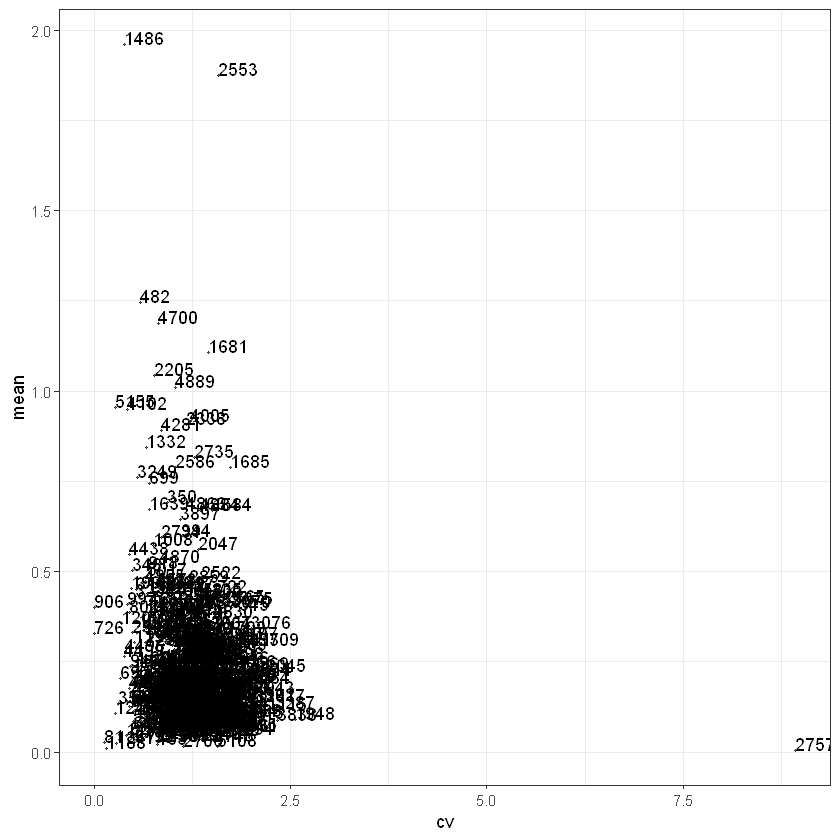

In [154]:
ggplot(CV, aes(x= cv, y= mean, label= Operation)) + 

  geom_point(size = 0.5,alpha = 0.6) +

  theme_bw()+

  geom_text(aes(label=Operation),hjust=0, vjust=0)

In [115]:
k_20 <- read.csv("table_export_DATA_JAN2020_CORRECTED.csv")
k_20$POST_DATE <- as.Date(k_20$POST_DATE)
k_20$EMP_NUM <- as.factor(k_20$EMP_NUM)
k_20$SUP_EMP_NUM <- as.factor(k_20$SUP_EMP_NUM)
k_20$OPERATION_NUM <- as.factor(k_20$OPERATION_NUM)
k_20$PRODUCT_LINE <- as.factor(k_20$PRODUCT_LINE)
k_20$PRODUCT_CELL_ID <- as.factor(k_20$PRODUCT_CELL_ID)
k_20$ROUTING_GROUP_ID <- as.factor(k_20$ROUTING_GROUP_ID)
k_20$DOC <- as.factor(k_20$DOC)

In [122]:
k_20 <- mutate(k_20,HRS_part = HRS/QUANTITY)

In [123]:
A <- as.matrix(unique(k_20$ROUTING_GROUP_ID))

In [124]:
CV <- data.frame(Part = integer(),cv = double(),mean = double())
for (i in 1:dim(A)[1]){
    part <- k_20[k_20$ROUTING_GROUP_ID == A[i],]
    w <- group_by(part,WORK_ORDER)
    b <- arrange(summarise(w,cycle_time = sum(HRS_part)),cycle_time)
    CV[i,1] <- A[i]
    CV[i,2] <- (var(b$cycle_time))^0.5/(sum(b$cycle_time)/dim(b)[1])
    CV[i,3] <- sum(b$cycle_time)/dim(b)[1]
}

In [125]:
arrange(CV,desc(cv))

Part,cv,mean
<chr>,<dbl>,<dbl>
1565,1.881667,0.10029670
4858,1.744252,0.23041667
1962,1.658483,0.92732143
1920,1.614327,2.13333333
5138,1.543235,0.84075000
4914,1.504408,0.02680556
1287,1.485232,0.44441667
3648,1.479379,0.99869565
4983,1.440537,0.16933333


In [126]:
O <- as.matrix(unique(k_20$OPERATION_NUM))

In [127]:
CV <- data.frame(Operation = integer(),cv = double(),mean = double())
for (i in 1:dim(O)[1]){
    part <- k_19[k_19$OPERATION_NUM == O[i],]
    w <- group_by(part,WORK_ORDER)
    b <- arrange(summarise(w,cycle_time = sum(HRS_part)),cycle_time)
    CV[i,1] <- A[i]
    CV[i,2] <- (var(b$cycle_time))^0.5/(sum(b$cycle_time)/dim(b)[1])
    CV[i,3] <- sum(b$cycle_time)/dim(b)[1]
}

In [128]:
arrange(CV,desc(cv))

Operation,cv,mean
<chr>,<dbl>,<dbl>
5155,8.933784,0.005561627
2497,2.559543,0.090664416
4697,2.332128,0.088093815
4542,2.308995,0.119822695
1573,2.207410,0.115141939
1170,2.187208,0.223314286
2763,2.175489,0.139513636
3897,2.097534,0.295384517
1582,2.058976,0.142762812


Warning message:
"Removed 3 rows containing missing values (geom_point)."
Warning message:
"Removed 3 rows containing missing values (geom_text)."


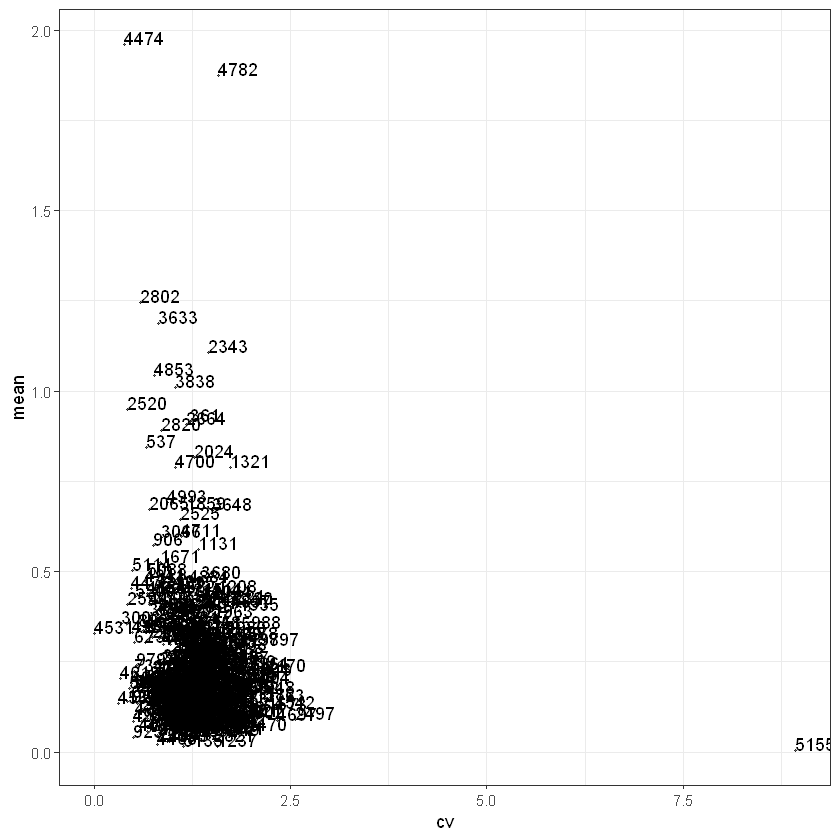

In [132]:
ggplot(CV, aes(x= cv, y= mean, label= Operation)) + 

  geom_point(size = 0.5,alpha = 0.6) +

  theme_bw()+

  geom_text(aes(label=Operation),hjust=0, vjust=0)